In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fact_bating_summary.csv")

Q1: Top 10 batsmen based on past 3 years total runs scored?

In [4]:
df_Bat = df.groupby('batsmanName')['runs'].agg(sum).sort_values(ascending=False)
df_Bat.head(10)

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

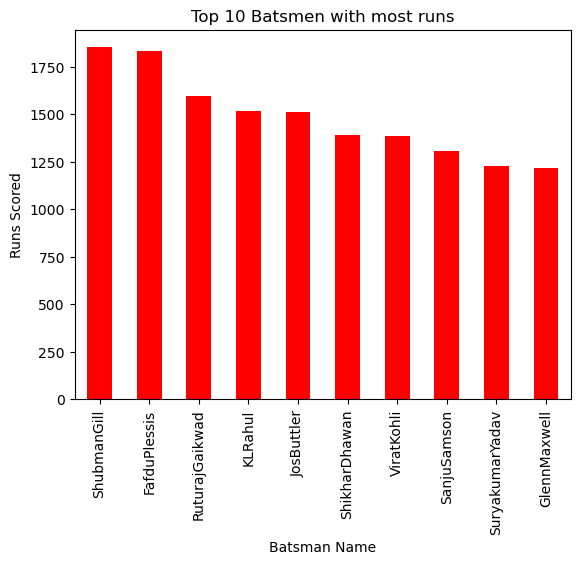

In [6]:
df_Bat.head(10).plot(kind='bar', color = 'red')
plt.title('Top 10 Batsmen with most runs')
plt.xlabel('Batsman Name')
plt.ylabel('Runs Scored')




plt.show()

Q2: Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)?

In [8]:
df = pd.read_csv("fact_bating_summary.csv")

# Filtering players with at least 60 balls faced in each season
df_filtered = df[df.groupby('batsmanName')['balls'].transform(max) >= 60]

# Calculating batting average for each player
df_batting_avg = (
    df_filtered.groupby('batsmanName')['runs']
    .sum() / df_filtered.groupby('batsmanName')['balls'].sum()
)

# Displaying the batting averages
print(df_batting_avg.head(10))

batsmanName
FafduPlessis        1.408462
JosButtler          1.469328
KLRahul             1.320557
MitchellMarsh       1.325175
PrabhsimranSingh    1.437500
QuintondeKock       1.356223
RuturajGaikwad      1.376837
SanjuSamson         1.445676
ShikharDhawan       1.287697
ShubmanGill         1.390684
dtype: float64


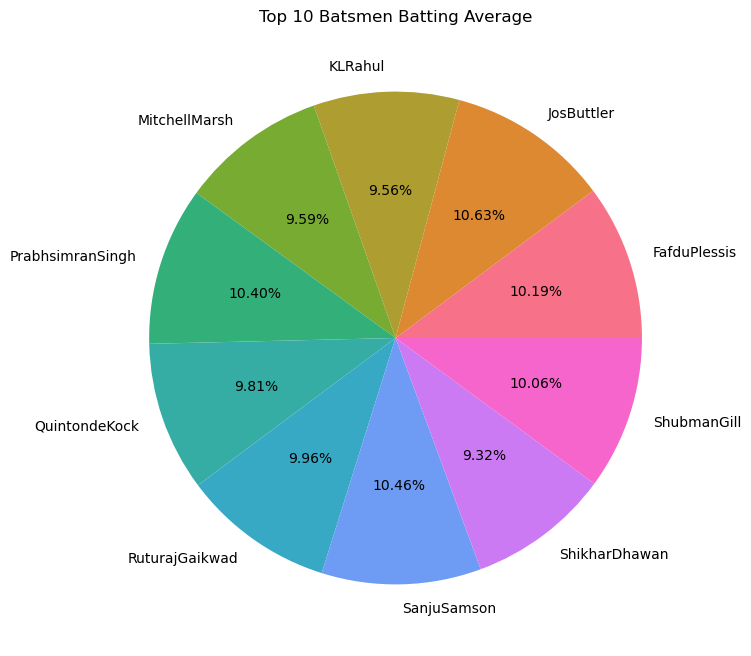

In [9]:
df_batting_avg_head10 = df_batting_avg.head(10)
labels = df_batting_avg_head10.index.to_list()
colors = sns.color_palette('husl', len(labels))

plt.figure(figsize=(15, 8))
plt.pie(df_batting_avg_head10, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Top 10 Batsmen Batting Average')
plt.show()

Q3: Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)?

batsmanName
YashasviJaiswal     152.150538
JosButtler          146.932814
SanjuSamson         144.567627
PrabhsimranSingh    143.750000
FafduPlessis        140.846154
ShubmanGill         139.068370
RuturajGaikwad      137.683665
QuintondeKock       135.622318
MitchellMarsh       132.517483
KLRahul             132.055749
dtype: float64


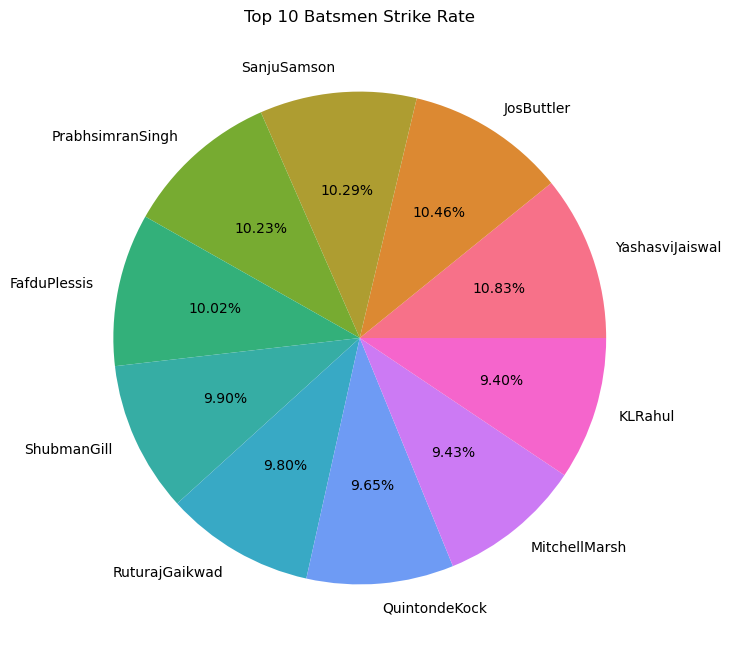

In [10]:
# Filter players with at least 60 balls faced in each season
df_filtered = df[df.groupby('batsmanName')['balls'].transform(max) >= 60]

# Calculate strike rate for each player
df_strike_rate = (
    df_filtered.groupby('batsmanName')['runs']
    .sum() / df_filtered.groupby('batsmanName')['balls'].sum() * 100
)

# Display the top 10 batsmen based on strike rate
print(df_strike_rate.sort_values(ascending=False).head(10))


df_strike_rate_head10 = df_strike_rate.sort_values(ascending=False).head(10)
labels = df_strike_rate_head10.index.to_list()
colors = sns.color_palette('husl', len(labels))

plt.figure(figsize=(15, 8))
plt.pie(df_strike_rate_head10, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Top 10 Batsmen Strike Rate')
plt.show()

Q4: Top 5 batsmen based on past 3 years boundary % (fours and sixes)?

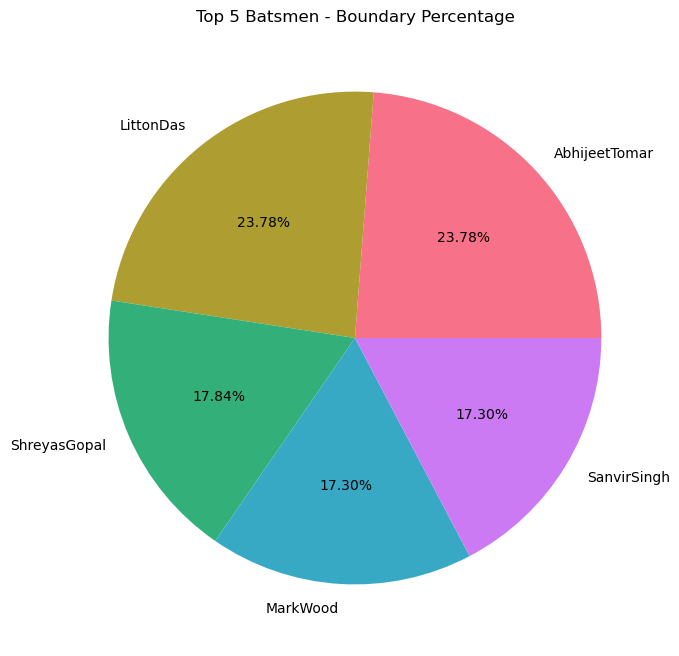

In [11]:
# Calculating total fours and sixes for each batsman
df_boundaries = df.groupby('batsmanName')['4s'].sum() + df.groupby('batsmanName')['6s'].sum()

# Calculating total runs for each batsman
df_total_runs = df.groupby('batsmanName')['runs'].sum()

# Calculating percentage of boundaries for each batsman    - (boundaries i.e 4's + 6's)/total runs
df_boundary_percentage = (df_boundaries / df_total_runs) * 100

# Sorting by highest percentage and select top 5
df_top_5_boundaries = df_boundary_percentage.sort_values(ascending=False).head(5)

# Preparing data for pie chart
labels = df_top_5_boundaries.index.to_list()
colors = sns.color_palette('husl', len(labels))

# Creating and customize pie chart
plt.figure(figsize=(15, 8))
plt.pie(df_top_5_boundaries, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Top 5 Batsmen - Boundary Percentage')
plt.show()

Q5: Top 10 bowlers based on past 3 years total wickets taken?

In [12]:
df_bowl = pd.read_csv("fact_bowling_summary.csv")

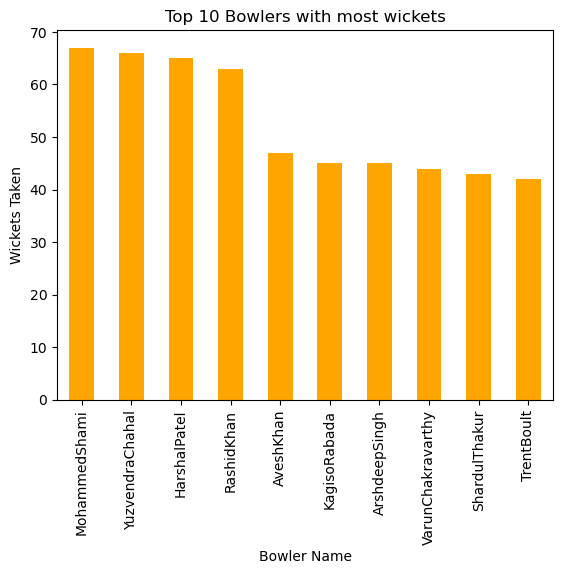

In [14]:
df_bowl_wickets = df_bowl.groupby('bowlerName')['wickets'].sum().sort_values(ascending=False).head(10)

df_bowl_wickets.plot(kind='bar',color='orange')
plt.title('Top 10 Bowlers with most wickets')
plt.xlabel('Bowler Name')
plt.ylabel('Wickets Taken')


plt.show()

Q6: Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [15]:
# adding a new coloumn named balls
df_bowl['balls'] = df_bowl['overs'] * 6

bowlerName
AyushBadoni         5.500000
ImranTahir          8.000000
DewaldBrevis        8.000000
RamandeepSingh      9.000000
MoisesHenriques    11.250000
MarkWood           11.818182
MohitSharma        13.370370
TristanStubbs      14.000000
ReeceTopley        14.000000
MujeebUrRahman     14.500000
dtype: float64


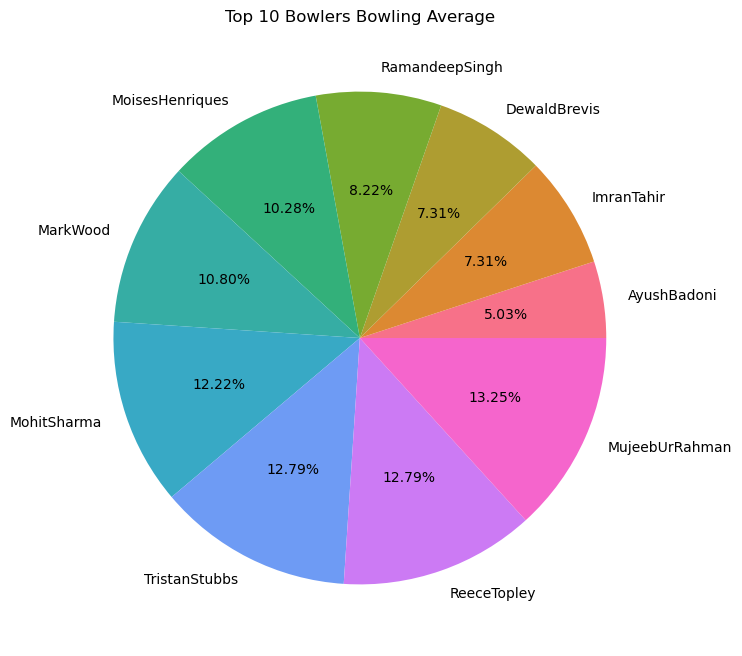

In [16]:
# Calculating bowling average for each bowler  - runs/wickets
df_bowling_avg = (df_bowl.groupby('bowlerName')['runs'].sum() / df_bowl.groupby('bowlerName')['wickets'].sum()).sort_values()

# Displaying the top 10 bowlers based on bowling average
print(df_bowling_avg.head(10))

df_bowling_avg_head10 = df_bowling_avg.head(10)
labels = df_bowling_avg_head10.index.to_list()
colors = sns.color_palette('husl', len(labels))

plt.figure(figsize=(15, 8))
plt.pie(df_bowling_avg_head10, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Top 10 Bowlers Bowling Average')
plt.show()

Q7: Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

bowlerName
ImranTahir         4.000000
MoisesHenriques    4.500000
AyushBadoni        5.238095
MatthewShort       6.250000
PrashantSolanki    6.333333
PraveenDubey       6.333333
SunilNarine        6.600000
TilakVarma         6.666667
MitchellSantner    6.806452
DavidWilley        6.807692
dtype: float64


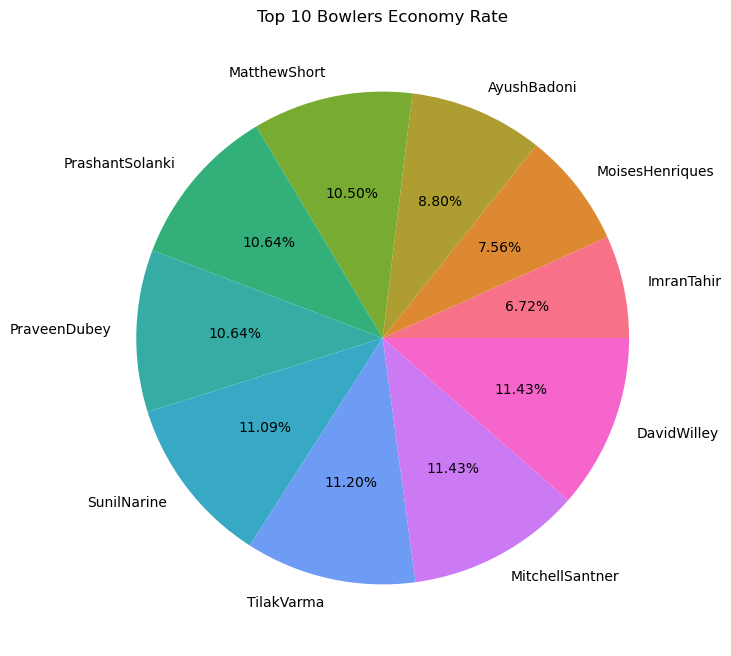

In [17]:
# Calculating economy rate for each bowler
df_economy_rate = (df_bowl.groupby('bowlerName')['runs'].sum() / df_bowl.groupby('bowlerName')['overs'].sum()).sort_values()

# Displaying the top 10 bowlers based on economy rate
print(df_economy_rate.head(10))

# Plotting
df_economy_rate_head10 = df_economy_rate.head(10)
labels = df_economy_rate_head10.index.to_list()
colors = sns.color_palette('husl', len(labels))

plt.figure(figsize=(15, 8))
plt.pie(df_economy_rate_head10, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Top 10 Bowlers Economy Rate')
plt.show()

Q8: Top 5 bowlers based on past 3 years dot ball %.

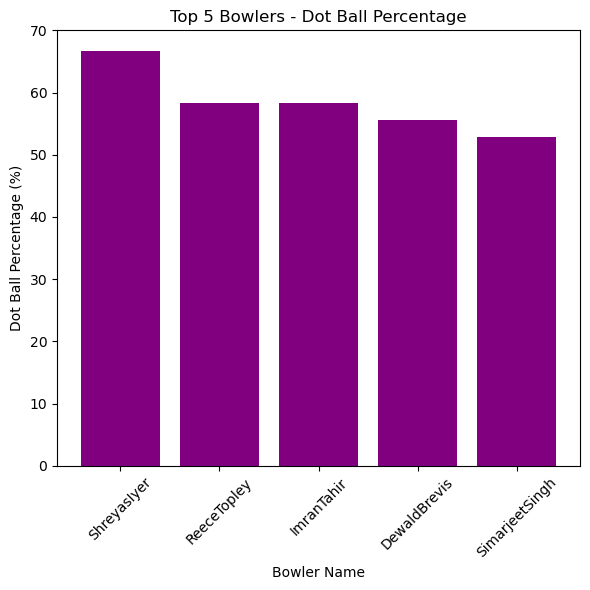

In [19]:
# Sorting data frame by bowler name
df_bowl_sorted = df_bowl.sort_values(by='bowlerName')

# Calculating dot balls for each bowler
df_dot_balls = df_bowl_sorted.groupby('bowlerName')['0s'].sum()

# Calculating total balls bowled for each bowler
df_total_balls = df_bowl_sorted.groupby('bowlerName')['balls'].sum()

# Calculating percentage of dot balls for each bowler
df_dot_ball_percentage = (df_dot_balls / df_total_balls) * 100

# Sorting by highest percentage and selecting top 5
df_top_5_dot_balls = df_dot_ball_percentage.sort_values(ascending=False).head(5)

# Preparing data for bar chart
labels = df_top_5_dot_balls.index.tolist()
values = df_top_5_dot_balls.values.tolist()

# Creating and customizing bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, values, color='purple')
plt.title('Top 5 Bowlers - Dot Ball Percentage')
plt.xlabel('Bowler Name')
plt.ylabel('Dot Ball Percentage (%)')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Q9: Top 4 teams based on past 3 years winning %.

In [20]:
df_team_data = pd.read_csv("dim_match_summary.csv")

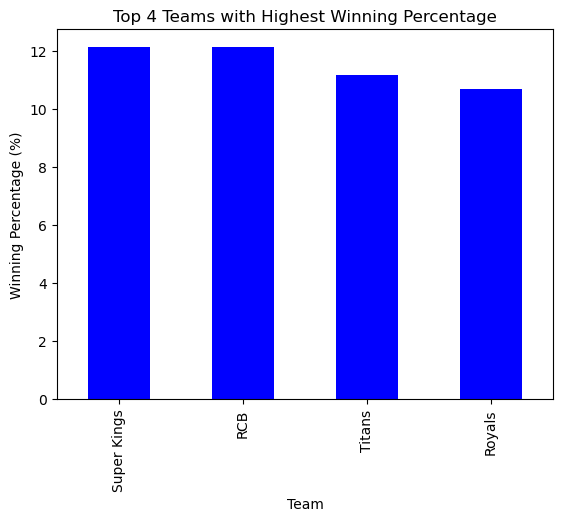

In [23]:
# Counting the number of wins for each team
team_wins = df_team_data['winner'].value_counts()

# Calculating the winning percentage for each team
team_win_pct = (team_wins / len(df_team_data)) * 100

# Selecting the top 4 teams with the highest winning percentage
top_4_teams = team_win_pct.head(4)

# Creating a bar chart to visualize the data
top_4_teams.plot(kind='bar', color = 'blue')
plt.title('Top 4 Teams with Highest Winning Percentage')
plt.xlabel('Team')
plt.ylabel('Winning Percentage (%)')


plt.show()

Q10 Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years?

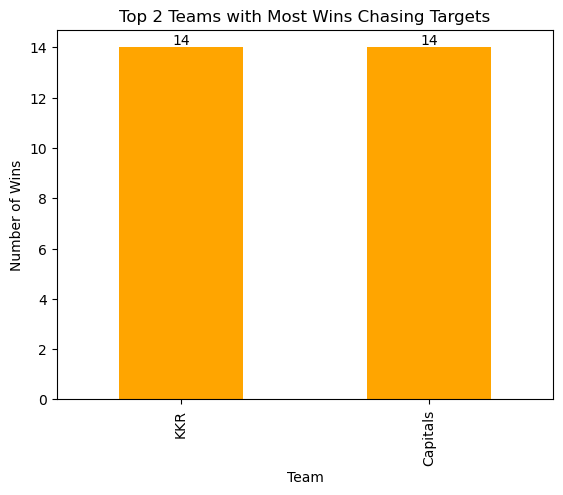

In [24]:
# Filtering matches where the winner chased the target
df_chased = df_team_data[df_team_data['winner'] != df_team_data['team1']]

# Counting the number of wins for each team while chasing
team_wins_chasing = df_chased['winner'].value_counts()

# Selecting the top 2 teams with the highest number of wins while chasing
top_2_teams_chasing = team_wins_chasing.head(2)

# Creating a bar chart to visualize the data
top_2_teams_chasing.plot(kind='bar', color = 'orange')
plt.title('Top 2 Teams with Most Wins Chasing Targets')
plt.xlabel('Team')
plt.ylabel('Number of Wins')

for i, value in enumerate(top_2_teams_chasing):
  plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()